In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import cv2
import numpy as np
import pandas as pd
import numba
import scipy.signal
import malko_fly as mf
import matplotlib
from scipy.optimize import curve_fit

matplotlib.rcParams.update({"font.size": 6})
mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

<IPython.core.display.Javascript object>

In [3]:
nPosts = 3
dVal = 0.8  # distance cutoff to filter trajectories that end too far from the posts
randomisations = 1000


dataDIR = "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/data/"
dbDIR = "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/"

folders = [
    ""
]  # ['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

<IPython.core.display.Javascript object>

In [4]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts, dVal):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
        self.dVal = dVal

    def __call__(self):
        df, fetched, angles = self.preprocessData()
        # df = self.distanceFilter(df)
        return df, self.getArchitechture(df, fetched, angles)

    def preprocessData(self):
        return mf.preprocess_fly_data(
            self.dataDIR, self.projectDB, self.expDB, self.nPosts
        )

    def distanceFilter(self, df):
        return mf.distance_filter_trajectories(self.dVal, self.nPosts, df)

    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(
            self.projectDB, self.expDB, self.nPosts, df, fetched, angles
        )

<IPython.core.display.Javascript object>

In [5]:
all_experiments = mf.swarm.Swarm()
for i in range(0, len(folders)):
    projectDB = dbDIR + folders[i] + "/flyProjects.db"
    expDB = dbDIR + folders[i] + "/flyExperiments.db"

    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts, dVal)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('0b4dc1ba-58fe-4452-9f75-630dd7cd07a8',), ('4246d654-d004-485e-b973-cac3c3166373',), ('13e90759-be07-45ae-8ee5-fcdf9be85a44',), ('0cfdafde-8490-4b30-883a-01e9374234df',), ('7fb76a33-f74a-4005-b991-b7105633eeac',), ('80233d06-82a2-418c-b181-1bbbe0e0ff47',), ('62202c43-8b41-4e05-937b-459c786c9ccc',), ('4a131068-1b6a-4670-a99b-32103add13f3',), ('deafc570-bc73-42f4-8634-b21172e7baac',), ('9834e990-9387-4bd9-99a6-e2c8cac3621f',), ('ab262461-6761-43a7-9ad1-e2cb17b302d7',), ('b80884bd-a9da-4fa3-982e-1e52df4dfb14',), ('efee6351-ab0a-4707-90c8-933894241713',), ('e85eca37-6e1c-4252-b42c-24a7c191e91e',), ('e9977fc2-3de7-4771-b390-fe29c7f74920',), ('1977ecca-488e-448f-bedb-cb66e131c304',), ('d974e485-498e-4b19-8e30-89264113c963',), ('a5a4a54a-155d-430e-b949-782ea68b87f4',), ('9afcf465-1f32-4533-a0ef-7db545b7e08e',), ('5a6ab36d-3aa5-478f-8c96-228501194c42',), ('f03f1351-4858-4b97-9605-0a78745b47c5',), ('fa1e0a37-cbe4-42ca-bd43-ae7679dcac32',), ('1eb55008-d45e-4ab8-b9eb-cce3faa75501',), 

/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:313: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (np.linalg.norm(v1, axis=1))[:, None]
/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:314: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (np.linalg.norm(v2, axis=1))[:, None]


<IPython.core.display.Javascript object>

In [6]:
if nPosts == 2:
    xs = all_experiments.get((0, 1)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, 1)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, 1, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, 1, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, 1, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, 1, 0, 0, 2)).var["x"][:, 1])[0]

else:
    xs = all_experiments.get((0, 2)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, 2)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, 2, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, 2, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, 2, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, 2, 0, 0, 2)).var["x"][:, 1])[0]

    post2_x = np.unique(all_experiments.get((0, 2, 0, 0, 3)).var["x"][:, 0])[0]
    post2_y = np.unique(all_experiments.get((0, 2, 0, 0, 3)).var["x"][:, 1])[0]

    xs = np.concatenate((xs, xs))
    ys = np.concatenate((ys, -ys))

 -- Architecture --


<IPython.core.display.Javascript object>

In [7]:
nbins = 500
peak_threshold = 0.9


def density_map(x, y, stats=True):
    if nPosts == 2:
        val = 201

        blur = (11, 11) if stats == True else (val, val)
        r = [[0, post0_x], [post0_y, post1_y]]
    else:
        val = 101

        blur = (11, 11) if stats == True else (val, val)
        r = [[0, post1_x], [post0_y, post2_y]]
    h, xedge, yedge, image = mf.pb.plt.hist2d(x, y, bins=nbins, normed=True, range=r)

    if nPosts == 2:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    else:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))

    for i in range(0, nbins):
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val

    return tmp_img

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  app.launch_new_instance()
findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


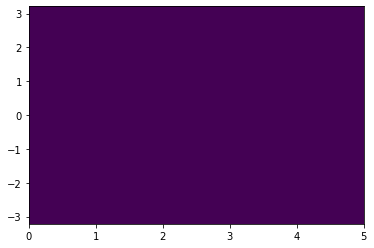

<IPython.core.display.Javascript object>

In [8]:
img = density_map(xs, ys, stats=False)

if nPosts == 2:
    x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y
else:
    x_peaks = np.where(img > peak_threshold)[1] * post1_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y

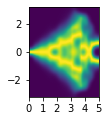

<IPython.core.display.Javascript object>

In [9]:
if nPosts == 2:
    fig, ax = mf.pb.plt.subplots(1, 1, figsize=(post0_x / 2.5, post1_y / 1.25))
    mf.pb.plt.imshow(img ** 2, extent=[0, post0_x, post0_y, post1_y])
    mf.pb.plt.xticks([0, 1, 2, 3, 4])
else:
    fig, ax = mf.pb.plt.subplots(1, 1, figsize=(1.25, post2_x / 2))
    mf.pb.plt.imshow(img ** 2, extent=[0, post1_x, post0_y, post2_y])
    mf.pb.plt.xticks([0, 1, 2, 3, 4, 5])

### Identify bifurcation point using a piecewise phase-transition function

#### Get first bifurcation point (randomisations)
We cannot produce a reasonable bifurcation post randomisations. Our results are statistically significant and cannot be produced with randomised trajectory points.

In [10]:
def fitfunc(x, p, q, r):
    if x < p:
        return 0
    else:
        return r * (np.abs((x - p)) ** q)


def fitfunc_vec_self(x, p, q, r):
    y = np.zeros(x.shape)
    for i in range(len(y)):
        y[i] = fitfunc(x[i], p, q, r)
    return y

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  app.launch_new_instance()
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in greater
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100
200
300
400
500
600
700
800
900


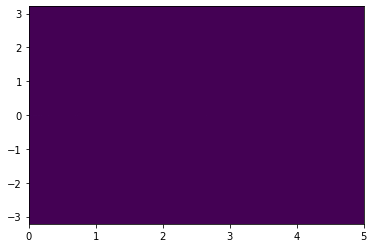

<IPython.core.display.Javascript object>

In [11]:
positive_bif = []

while True:
    if nPosts == 2:
        x_fit = []
        y_fit = []

        x_sub = np.concatenate((xs, xs))
        y_sub = np.concatenate((ys, -ys))
        np.random.shuffle(y_sub)

        tmp_img = density_map(x_sub, y_sub, stats=True)
        x_fit = np.where(tmp_img > peak_threshold)[1] * post0_x / nbins
        y_fit = (
            np.where(tmp_img > peak_threshold)[0] * (post0_y - post1_y) / nbins
            + post1_y
        )

        x_fit = x_fit
        y_fit = np.abs(y_fit)

        try:
            fit_params, pcov = curve_fit(
                fitfunc_vec_self, x_fit, y_fit, p0=[2.5, 1, 1], maxfev=10000
            )

            if (
                (fit_params[0] > 0)
                & (fit_params[0] < post0_x)
                & (fit_params[1] > 0.1)
                & (fit_params[2] > 0.5)
            ):
                positive_bif.append(1)
            else:
                positive_bif.append(0)
        except RuntimeError:
            pass

    else:
        xs1 = xs[np.where(xs < 3.0)[0]]
        ys1 = ys[np.where(xs < 3.0)[0]]

        x_fit = []
        y_fit = []

        x_sub = np.concatenate((xs1, xs1))
        y_sub = np.concatenate((ys1, -ys1))
        np.random.shuffle(y_sub)

        tmp_img = density_map(x_sub, y_sub, stats=True)
        x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
        y_fit = (
            np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins
            + post2_y
        )

        x_fit = x_fit
        y_fit = np.abs(y_fit)

        try:
            fit_params, pcov = curve_fit(
                fitfunc_vec_self, x_fit, y_fit, p0=[1.5, 1, 1], maxfev=10000
            )

            if (
                (fit_params[0] > 0)
                & (fit_params[0] < post0_x)
                & (fit_params[1] > 0.1)
                & (fit_params[2] > 0.5)
            ):
                positive_bif.append(1)
            else:
                positive_bif.append(0)
        except RuntimeError:
            pass

    if len(positive_bif) >= randomisations:
        break

    if len(positive_bif) % 100 == 0:
        print(len(positive_bif))

In [12]:
np.sum(positive_bif) / len(positive_bif), len(positive_bif)

(0.0, 1000)

<IPython.core.display.Javascript object>

#### Get the first bifurcation point (without randomisations)
Once you have this, you can draw a line segment bisecting the angle between the point and two targets. This will be the line about which you symmetrise to get the second bifurcation point

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  app.launch_new_instance()
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


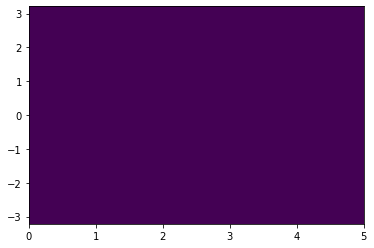

<IPython.core.display.Javascript object>

In [13]:
params1 = np.zeros((1, 3))

if nPosts == 2:
    x_fit = []
    y_fit = []

    indices = np.random.choice(len(xs), size=1000, replace=True)
    x_sub = np.concatenate((xs, xs))
    y_sub = np.concatenate((ys, -ys))

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post0_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)

    fit_params, pcov = curve_fit(
        fitfunc_vec_self, x_fit, y_fit, p0=[2.5, 1, 1], maxfev=10000
    )
    params1[0, :] = fit_params

else:
    xs1 = xs[np.where(xs < 3.0)[0]]
    ys1 = ys[np.where(xs < 3.0)[0]]

    x_fit = []
    y_fit = []

    x_sub = np.concatenate((xs1, xs1))
    y_sub = np.concatenate((ys1, -ys1))

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)

    fit_params, pcov = curve_fit(
        fitfunc_vec_self, x_fit, y_fit, p0=[1.5, 1, 1], maxfev=10000
    )
    params1[0, :] = fit_params

In [14]:
bisector_xs = [np.median(params1, axis=0)[0], post2_x]
bisector_ys = [
    0,
    np.tan(np.arctan2(post2_y, post2_x - np.min(params1, axis=0)[0]) / 2)
    * (post2_x - np.min(params1, axis=0)[0]),
]

<IPython.core.display.Javascript object>

#### Get the second bifurcation point
For this, you must center the trajectories about the bifurcation point, get a new heatmap and rotate this by the angle of the bisector line

In [15]:
# center points about the first bifurcation
cxs = xs - np.median(params1, axis=0)[0]
cys = ys

cpost0_x = post0_x - np.median(params1, axis=0)[0]
cpost1_x = post1_x - np.median(params1, axis=0)[0]
cpost2_x = post2_x - np.median(params1, axis=0)[0]

<IPython.core.display.Javascript object>

In [16]:
@numba.njit(fastmath=True, parallel=True)
def parallel_rotate(xy, rmat):
    out = np.zeros(xy.shape)
    for idx in numba.prange(xy.shape[0]):
        out[idx] = np.dot(rmat[idx], xy[idx])
    return out

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


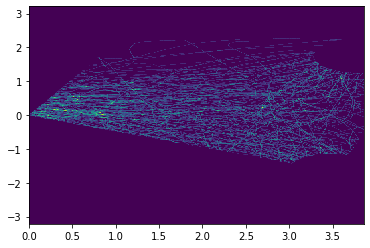

<IPython.core.display.Javascript object>

In [17]:
# clip all points to the left of and below 0 and points beyond post centers
ccxs = cxs[np.where(cxs > 0)[0]]
ccys = cys[np.where(cxs > 0)[0]]
ccxs = ccxs[np.where(ccys > 0)[0]]
ccys = ccys[np.where(ccys > 0)[0]]

xy = np.concatenate((ccxs.reshape(-1, 1), ccys.reshape(-1, 1)), axis=1)
angle = np.full(
    ccxs.shape, np.arctan2(post2_y, post2_x - np.median(params1, axis=0)[0]) / 2
)
rmat = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]).T
rx, ry = parallel_rotate(xy, rmat).T

blur = (101, 101)

r1 = [[0, post1_x], [post0_y, post2_y]]
r2 = [
    [-np.median(params1, axis=0)[0], post1_x - np.median(params1, axis=0)[0]],
    [post0_y, post2_y],
]
r3 = [[0, post1_x - np.median(params1, axis=0)[0]], [post0_y, post2_y]]

h1, xedge, yedge, image = mf.pb.plt.hist2d(xs, ys, bins=nbins, normed=True, range=r1)
h2, xedge, yedge, image = mf.pb.plt.hist2d(cxs, cys, bins=nbins, normed=True, range=r2)
h3, xedge, yedge, image = mf.pb.plt.hist2d(
    ccxs, ccys, bins=nbins, normed=True, range=r3
)
h4, xedge, yedge, image = mf.pb.plt.hist2d(rx, ry, bins=nbins, normed=True, range=r3)

tmp_img1 = np.flipud(np.rot90(cv2.GaussianBlur(h1, blur, 0)))
tmp_img2 = np.flipud(np.rot90(cv2.GaussianBlur(h2, blur, 0)))
tmp_img3 = np.flipud(np.rot90(cv2.GaussianBlur(h3, blur, 0)))
tmp_img4 = np.flipud(np.rot90(cv2.GaussianBlur(h4, blur, 0)))

for i in range(0, nbins):
    max_val = np.max(tmp_img1[:, i])
    tmp_img1[:, i] = tmp_img1[:, i] / max_val
    max_val = np.max(tmp_img2[:, i])
    tmp_img2[:, i] = tmp_img2[:, i] / max_val
    max_val = np.max(tmp_img3[:, i])
    tmp_img3[:, i] = tmp_img3[:, i] / max_val
    max_val = np.max(tmp_img4[:, i])
    tmp_img4[:, i] = tmp_img4[:, i] / max_val

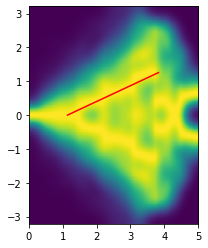

<IPython.core.display.Javascript object>

In [18]:
mf.pb.plt.imshow(tmp_img1, extent=[r1[0][0], r1[0][1], r1[1][0], r1[1][1]])
mf.pb.plt.plot(bisector_xs, bisector_ys, c="red")

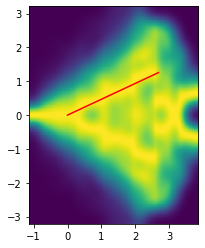

<IPython.core.display.Javascript object>

In [19]:
mf.pb.plt.imshow(tmp_img2, extent=[r2[0][0], r2[0][1], r2[1][0], r2[1][1]])
mf.pb.plt.plot(bisector_xs - np.median(params1, axis=0)[0], bisector_ys, c="red")

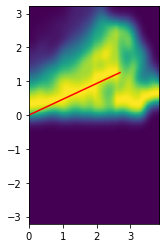

<IPython.core.display.Javascript object>

In [20]:
mf.pb.plt.imshow(np.flipud(tmp_img3), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])
mf.pb.plt.plot(bisector_xs - np.median(params1, axis=0)[0], bisector_ys, c="red")

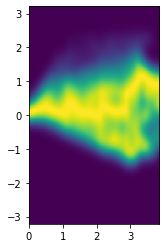

<IPython.core.display.Javascript object>

In [21]:
mf.pb.plt.imshow(np.flipud(tmp_img4), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  app.launch_new_instance()
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


100
200
300
400
500
600
700
800
900


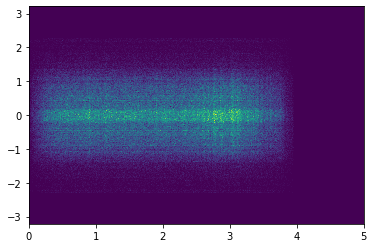

<IPython.core.display.Javascript object>

In [22]:
positive_bif2 = []

while True:
    x_fit = []
    y_fit = []

    x_sub = np.concatenate((rx, rx))
    y_sub = np.concatenate((ry, -ry))
    np.random.shuffle(y_sub)

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)

    try:
        fit_params, pcov = curve_fit(
            fitfunc_vec_self, x_fit, y_fit, p0=[2.5, 0.5, 1], maxfev=10000
        )
        if (
            (fit_params[0] > 0)
            & (fit_params[0] < post0_x)
            & (fit_params[1] > 0.1)
            & (fit_params[2] > 0.5)
        ):
            positive_bif2.append(1)
        else:
            positive_bif2.append(0)
    except TypeError:
        pass

    if len(positive_bif2) >= randomisations:
        break

    if len(positive_bif2) % 100 == 0:
        print(len(positive_bif2))

In [23]:
np.sum(positive_bif2) / len(positive_bif2), len(positive_bif2)

(0.0, 1000)

<IPython.core.display.Javascript object>